In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
xls = pd.ExcelFile("/content/drive/MyDrive/PROJ201/All_Data.xlsx")
meteodf = pd.read_excel("/content/drive/MyDrive/PROJ201/All_Data.xlsx", sheet_name=xls.sheet_names[0]).drop(columns="Unnamed: 0")
no2df = pd.read_excel("/content/drive/MyDrive/PROJ201/All_Data.xlsx", sheet_name=xls.sheet_names[1]).drop(columns="Unnamed: 0")
so2df = pd.read_excel("/content/drive/MyDrive/PROJ201/All_Data.xlsx", sheet_name=xls.sheet_names[2]).drop(columns="Unnamed: 0")
pm10df = pd.read_excel("/content/drive/MyDrive/PROJ201/All_Data.xlsx", sheet_name=xls.sheet_names[3]).drop(columns="Unnamed: 0")
gasconsumpdf = pd.read_excel("/content/drive/MyDrive/PROJ201/All_Data.xlsx", sheet_name=xls.sheet_names[5]).drop(columns="Unnamed: 0")

In [ ]:
wantedDistricts = ["Arnavutkoy", "Bagcilar", "Basaksehir", "Besiktas", "Esenler", "Fatih",
                   "Kadikoy", "Kartal", "Sancaktepe", "Sariyer", "Sultangazi",
                    "Umraniye", "Uskudar"]

# Data Arranging

In [ ]:
# FOR AIR POLLUTORS ONLY
def arrangeAirPollutors(df):
  df = df.rename({"Basaksehir_MTHM": "Basaksehir", "Catladikapi": "Fatih_Catladikapi",
                       "Goztepe": "Kadikoy_Goztepe", "Kandilli_MTHM": "Uskudar_Kandilli",
                       "Maslak": "Sariyer_Maslak", "Aksaray": "Fatih_Aksaray", "Selimiye": "Kadikoy_Selimiye",
                       "Silivri_MTHM": "Silivri", "Sultangazi_MTHM": "Sultangazi",
                       "Sile_MTHM":"Sile", "Umraniye_MTHM":"Umraniye",
                       "Uskudar_MTHM": "Uskudar_2", "Kadikoy":"Kadikoy_1",
                      "Uskudar": "Uskudar_1", "Sariyer": "Sariyer_1"}, axis=1)

  # Getting mean for districts who have multiple stations
  for i in range(len(df.columns)):
    col1 = df.columns[i]
    for col2 in df.columns[i+1:]:
      if col2.split("_")[0] == col1.split("_")[0]:
        df[col2.split("_")[0]] = np.nanmean(df[[col1,col2]].to_numpy(), axis=1)
  try:
    df = df[wantedDistricts+["date"]]
  except:
    # in case of O3
    realwant = wantedDistricts+["date"]
    realwant.remove('Umraniye')
    realwant.remove('Uskudar')
    df =  df[realwant]
  return df

## Meteorological Data

In [ ]:
# İstasyon Kodlarından ilçe bulma

districtlst = []
for i in meteodf.stationID:
  if i == 17814:
    districtlst.append("Gungoren")
  elif i == 17813:
    districtlst.append("Kadikoy")
  elif i == 17064:
    districtlst.append("Kartal")
  elif i == 17059 or i == 18980:
    districtlst.append("Sariyer")
  elif i == 18400:
    districtlst.append("Silivri")
  elif i == 18403:
    districtlst.append("Umraniye")
  elif i == 18402:
    districtlst.append("Arnavutkoy")
  elif i == 17060:
    districtlst.append("Bakırkoy")
  elif i == 18101:
    districtlst.append("Eyup")
  elif i == 18401:
    districtlst.append("Sisli")
  elif i == 18404:
    districtlst.append("Uskudar")
  elif i == 17603:
    districtlst.append("Fatih")
  elif i == 17454:
    districtlst.append("Fatih")
  elif i == 17062:
    districtlst.append("Kadikoy")
  elif i == 17064:
    districtlst.append("Kartal")
  elif i == 19112:
    districtlst.append("Kartal")
  elif i == 18399:
    districtlst.append("Sancaktepe")
  elif i == 17455:
    districtlst.append("Sariyer")
  elif i == 17061:
    districtlst.append("Sariyer")
  elif i == 17610:
    districtlst.append("Sile")
  elif i == 18792:
    districtlst.append("Sile")
  elif i == 18735:
    districtlst.append("Sile")
  elif i == 18400:
    districtlst.append("Silivri")
  elif i == 17438:
    districtlst.append("Silivri")
  elif i == 18793:
    districtlst.append("Silivri")
  elif i == 17388:
    districtlst.append("Silivri")
  elif i == 19365:
    districtlst.append("Sariyer")
  elif i == 18403:
    districtlst.append("Sariyer")
meteodf["district"] = districtlst

In [ ]:
# ayrı iki yağış değerini birleştirdim
meteodf["total_precip"] = meteodf[["total_precip_manuel", "total_precip_omgi"]].sum(axis=1, min_count=1)
meteodf = meteodf.drop(columns=["total_precip_manuel", "total_precip_omgi", "evapo",
                                "max_temp", "min_temp"])

In [ ]:
# çalışma alanına göre filtreleme
#meteodf = meteodf[meteodf.district.isin(wantedDistricts) == True]

In [ ]:
meteodf["date"] = pd.to_datetime(meteodf.date)

In [ ]:
meteodf

,date,stationID,station,mean_temp,rel_hum,district,total_precip
0,2021-01-01,17814,MARMARA,13.0,75.5,Gungoren,4.4
1,2021-01-02,17814,MARMARA,14.0,57.5,Gungoren,0.0
2,2021-01-03,17814,MARMARA,6.6,73.9,Gungoren,0.0
3,2021-01-04,17814,MARMARA,7.0,69.1,Gungoren,0.0
4,2021-01-05,17814,MARMARA,21.7,57.0,Gungoren,0.0
...,...,...,...,...,...,...,...
27370,2022-12-27,18403,ÜMRANİYE,23.9,87.6,Umraniye,0.2
27371,2022-12-28,18403,ÜMRANİYE,NaN,NaN,Umraniye,NaN
27372,2022-12-29,18403,ÜMRANİYE,13.6,81.7,Umraniye,0.0
27373,2022-12-30,18403,ÜMRANİYE,NaN,NaN,Umraniye,NaN


## Air Pollutors

In [ ]:
no2df = arrangeAirPollutors(no2df)
so2df = arrangeAirPollutors(so2df)
pm10df = arrangeAirPollutors(pm10df)

In [ ]:
no2df

,Arnavutkoy,Bagcilar,Basaksehir,Besiktas,Esenler,Fatih,Kadikoy,Kartal,Sancaktepe,Sariyer,Sultangazi,Umraniye,Uskudar,date
0,9.987500,NaN,2.681176,42.620833,36.025000,52.500000,NaN,43.591667,29.400000,17.825000,57.508095,17.919000,35.054348,2021-01-01
1,33.183333,50.445833,9.905000,57.204167,85.416667,73.039583,NaN,73.925000,NaN,24.233333,147.989167,39.890000,60.323698,2021-01-02
2,39.958333,48.754167,8.989565,47.050000,91.670833,57.589583,NaN,72.345833,57.500000,28.541667,147.485417,37.554211,57.153385,2021-01-03
3,61.270833,67.020833,16.136667,82.437500,103.479167,88.361458,NaN,103.704348,56.904348,33.004167,191.221667,45.783333,73.320312,2021-01-04
4,NaN,35.957895,5.516190,75.586957,76.158333,83.027989,53.623810,67.973913,NaN,29.491304,135.334167,36.934211,61.800000,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,14.116667,43.370833,39.994167,71.666667,52.060870,77.104167,18.137296,36.887500,NaN,41.581658,29.617917,43.406250,42.019271,2023-10-28
1031,23.404167,48.950000,46.508333,68.333333,65.716667,95.916667,23.954687,43.754167,NaN,48.579167,45.038750,71.119167,54.112083,2023-10-29
1032,18.491667,33.965217,34.515833,46.883333,48.479167,68.123191,18.026563,21.641667,NaN,17.610417,27.200000,58.984167,39.997083,2023-10-30
1033,28.070833,48.091304,60.762917,59.675000,56.820833,73.083333,17.198437,46.075000,NaN,49.452083,38.976250,60.460833,48.451302,2023-10-31


## Natural Gas

In [ ]:
gasconsumpdf = gasconsumpdf.rename({"province": "district"}, axis=1)
gasconsumpdf

In [ ]:
newgasdf = pd.DataFrame()
for name in gasconsumpdf.district.unique():
  df = gasconsumpdf[gasconsumpdf.district == name]
  df = df.drop(columns = "district")
  df = df.rename(columns={"natural_gas_consumption":name})
  try:
    newgasdf = pd.merge(newgasdf, df, on = "date")
  except:
    newgasdf = df

newgasdf = newgasdf.rename(columns={"date": "date1"})
newgasdf

,Arnavutkoy,date1,Bagcilar,Basaksehir,Besiktas,Esenler,Fatih,Kadikoy,Kartal,Sancaktepe,Sariyer,Silivri,Sultangazi,Sile,Umraniye,Uskudar
0,25666678,2021-01-01,36624188,30159608,24100347,19311365,23688870,50365568,29421680,25683447,31903539,18361444,24701892,3674973,43536717,38279146
1,24343707,2021-02-01,35113706,28968662,23020271,18557697,22741628,48015425,28130242,24301543,30762295,17078058,23510581,3338450,41576967,36849606
2,27803116,2021-03-01,40203717,33497859,27053792,21179431,26445560,55133444,32814584,27828917,35932296,19514312,26915771,3721547,48028902,42566395
3,19715293,2021-04-01,25839358,24269902,17691255,13282373,17179892,34107996,20715065,18112743,23921332,14368796,17767446,2929983,30645308,27149641
4,9571574,2021-05-01,8933519,10900254,4843496,4053785,5360777,8690579,6911337,6902004,7435405,6880186,6196772,1294644,9972444,7921966
5,9219296,2021-06-01,7917773,10740106,3709270,3290811,4763284,5634269,5759880,5990482,5468777,6398800,5441310,1175513,8458314,5941105
6,7303184,2021-07-01,5804600,8740904,2947193,2394928,3873060,3994402,4294584,4781095,3812711,4751870,4236191,882273,6458449,4246198
7,8693149,2021-08-01,6210871,9243957,2824001,2471837,4036790,4190181,4221961,5100817,4042220,5833339,4650821,975363,6764921,4395887
8,9417719,2021-09-01,7188994,10313846,3697880,2963928,4598355,5446184,5223570,5663243,5093947,6152005,5598331,1075325,8022086,5353292
9,13263522,2021-10-01,12745117,16073080,9804023,5795951,8829240,15466411,9949242,9920710,12650125,8865860,9568082,1576787,16273164,13009229


In [ ]:
gas_daily = newgasdf.set_index("date1").resample('D').ffill()/30
gas_daily

In [ ]:
gas_daily /= 10**3
gas_daily

,Arnavutkoy,Bagcilar,Basaksehir,Besiktas,Esenler,Fatih,Kadikoy,Kartal,Sancaktepe,Sariyer,Silivri,Sultangazi,Sile,Umraniye,Uskudar
date1,,,,,,,,,,,,,,,
2021-01-01,855.555933,1220.806267,1005.320267,803.344900,643.712167,789.629000,1678.852267,980.722667,856.114900,1063.4513,612.048133,823.396400,122.499100,1451.223900,1275.971533
2021-01-02,855.555933,1220.806267,1005.320267,803.344900,643.712167,789.629000,1678.852267,980.722667,856.114900,1063.4513,612.048133,823.396400,122.499100,1451.223900,1275.971533
2021-01-03,855.555933,1220.806267,1005.320267,803.344900,643.712167,789.629000,1678.852267,980.722667,856.114900,1063.4513,612.048133,823.396400,122.499100,1451.223900,1275.971533
2021-01-04,855.555933,1220.806267,1005.320267,803.344900,643.712167,789.629000,1678.852267,980.722667,856.114900,1063.4513,612.048133,823.396400,122.499100,1451.223900,1275.971533
2021-01-05,855.555933,1220.806267,1005.320267,803.344900,643.712167,789.629000,1678.852267,980.722667,856.114900,1063.4513,612.048133,823.396400,122.499100,1451.223900,1275.971533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28,801.615200,1086.573900,983.665400,712.458000,579.533667,744.956267,1432.312633,880.075833,775.120800,999.6821,534.596967,767.180367,99.159000,1315.049467,1163.589333
2023-03-29,801.615200,1086.573900,983.665400,712.458000,579.533667,744.956267,1432.312633,880.075833,775.120800,999.6821,534.596967,767.180367,99.159000,1315.049467,1163.589333
2023-03-30,801.615200,1086.573900,983.665400,712.458000,579.533667,744.956267,1432.312633,880.075833,775.120800,999.6821,534.596967,767.180367,99.159000,1315.049467,1163.589333


In [ ]:
gas_daily["date"] = pd.to_datetime(gas_daily.index)

# Analysis

In [ ]:
def arrangebyStation(district):
  try:
    df = meteodf.groupby("district").get_group(district).merge(gas_daily[[district, "date"]], on = "date", how="outer")
  except KeyError:
    # En yakın istasyon
    if district == "Bagcilar":
      name = 17814
    elif district == "Basaksehir" or district == "Sultangazi":
      name = 18101
    elif district == "Besiktas":
      name = 18401
    elif district == "Esenler":
      name = 17814

    df = meteodf.groupby("stationID").get_group(name).merge(gas_daily[[district, "date"]], on = "date", how="outer")
  df = df.drop(columns=["stationID", "station"])
  df = df.rename(columns={district : "gas_consumption"})
    #print("For {} district there is no meteorological data".format(district))
  df["NO2"] = no2df[district]
  df["PM10"] = pm10df[district]
  df["SO2"] = so2df[district]

  return df

In [ ]:
districtsDict = {}
for district in wantedDistricts:
  df = arrangebyStation(district)
  districtsDict[district] = df

  f, ax = plt.subplots(figsize=(10,8))
  sns.heatmap(districtsDict[district].corr(), annot=True, fmt='.1g', ax=ax,
              vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',
              linewidths=3, linecolor='black')
  plt.tight_layout()
  plt.savefig("/content/drive/MyDrive/PROJ201/Correlations/"+district+"_correlation.png")

In [ ]:
districtsDict[district]

,date,mean_temp,rel_hum,district,total_precip,gas_consumption,NO2,PM10,SO2
0,2021-01-01,12.9,65.0,Uskudar,7.3,1275.971533,35.054348,23.606771,4.715559
1,2021-01-02,14.9,43.3,Uskudar,0.0,1275.971533,60.323698,56.128385,5.560625
2,2021-01-03,6.0,63.6,Uskudar,0.0,1275.971533,57.153385,57.191406,5.505897
3,2021-01-04,6.6,62.8,Uskudar,0.8,1275.971533,73.320312,78.813802,6.785208
4,2021-01-05,21.6,49.0,Uskudar,0.0,1275.971533,61.800000,36.857548,5.464389
...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,27.2,57.0,Uskudar,0.1,NaN,NaN,NaN,NaN
1091,2023-12-28,NaN,NaN,Uskudar,NaN,NaN,NaN,NaN,NaN
1092,2023-12-29,19.1,97.8,Uskudar,0.0,NaN,NaN,NaN,NaN
1093,2023-12-30,NaN,NaN,Uskudar,NaN,NaN,NaN,NaN,NaN


# Linear Regression

In [ ]:
def fillingNAN(district):
  data = districtsDict[district]
  data = data[data.date < "2023-11-01"].drop(columns=["total_precip", "district"])
  data = data.set_index("date")
  data = data.interpolate()
  for i in data.columns:
    if data[i].isna().sum() != 0:
      data[i] = data[i].fillna(data[i].mean())
    if data[i].isna().sum() == data[i].shape[0]: # Bazı O3ler için
      data = data.drop(columns=i)
  #data.to_csv("output_"+district+".csv")
  districtsDict[district] = data

In [ ]:
for district in districtsDict.keys():
  f, axs = plt.subplots(3,2, figsize = (20,15))
  fillingNAN(district)
  i = 0
  j = 0
  for col in districtsDict[district].columns:
    sns.kdeplot(data = districtsDict[district], x = col, ax = axs[i,j])
    axs[i,j].set_xlabel(col)
    axs[i,j]
    j+=1
    if j == 2:
      i +=1
      j = 0

  plt.savefig("/content/drive/MyDrive/PROJ201/Histograms/"+district+".png")

In [ ]:
for district in districtsDict.keys():
  f, axs = plt.subplots(3,2, figsize = (20,15))
  i = 0
  j = 0
  for col in districtsDict[district].columns:
    sm.qqplot(data = districtsDict[district][col], ax = axs[i,j], line="q")
    axs[i,j].set_xlabel(col)
    axs[i,j]
    j+=1
    if j == 2:
      i +=1
      j = 0

  plt.savefig("/content/drive/MyDrive/PROJ201/ProbPlot/"+district+".png")

In [ ]:
def DistTransformation(series, district, param):
  s = series.copy()
  transdict = {}

  transdict["log"] = np.log(s) #logaritmic
  transdict["log"] = transdict["log"].replace([np.inf, -np.inf], 0) # if it is 0
  transdict["rec"] = 1/s #reciprocal
  transdict["sqrt"] = np.sqrt(s) #square root
  s1 = s**(1/1.2)
  s2 = (-1*s)
  s2 = s2**(1/1.2)
  s1 = s1.fillna(0).replace([np.inf, -np.inf], 0)
  s2 = s2.fillna(0).replace([np.inf, -np.inf], 0)
  transdict["exp"] = s1 + s2 #exponential
  try:
    transdict["boxcox"], _ = stats.boxcox(s) #boxcox transform
  except:
    #for mean temperature because it may be negative
    pass

  f, axs = plt.subplots(2, 5, figsize = (25,17))
  i =0
  for key in transdict.keys():
    sns.kdeplot(data = transdict[key], ax = axs[0,i])
    sm.qqplot(data = transdict[key], ax = axs[1,i], line="q")
    axs[0,i].set_xlabel(param)
    axs[0,i].set_title(key)
    axs[1,i].set_xlabel(param)
    axs[1,i].set_title(key)
    i+=1

  plt.savefig("/content/drive/MyDrive/PROJ201/Transformation_Graphs/"+district+"/"+district+"_"+param+".png")
  return transdict

In [ ]:
transformDict = {}
for district in tqdm(districtsDict.keys()):
  transformDict[district] = {}
  for param in districtsDict[district]:
    transformDict[district][param] = DistTransformation(districtsDict[district][param],
                                                        district, param)

In [ ]:
"""appropDict = {
    "Arnavutkoy": {"mean_temp": "exp", "NO2": "log", "SO2": "boxcox", "PM10": "log"},
    "Bagcilar": {"NO2": "sqrt", "SO2": "log", "PM10": "log"},
    "Basaksehir": {"NO2": "log", "SO2": "boxcox", "rel_hum": "boxcox", "PM10": "log"},
    "Besiktas": {"mean_temp": "exp", "NO2": "log", "SO2": "log", "PM10": "log"},
    "Esenler": {"NO2": "log", "PM10": "log"},
    "Fatih": {"rel_hum": "log"},
    "Kadikoy": {"mean_temp": "exp", "rel_hum":"boxcox"},
    "Kartal": {"mean_temp": "exp"},
    "Sancaktepe": {"mean_temp": "exp", "NO2": "boxcox", "SO2":"log", "PM10":"log"},
    "Sariyer":{"rel_hum": "boxcox"},
    "Sultangazi":{"mean_temp": "exp", "NO2":"log", "SO2": "boxcox", "rel_hum": "boxcox", "PM10":"sqrt"},
    "Umraniye":{"mean_temp":"exp", "NO2":"sqrt", "SO2":"boxcox", "rel_hum":"boxcox", "PM10":"log"},
    "Uskudar":{"NO2":"log", "SO2":"log", "PM10":"log"}
}"""

'appropDict = {\n    "Arnavutkoy": {"mean_temp": "exp", "NO2": "log", "SO2": "boxcox", "PM10": "log"},\n    "Bagcilar": {"NO2": "sqrt", "SO2": "log", "PM10": "log"},\n    "Basaksehir": {"NO2": "log", "SO2": "boxcox", "rel_hum": "boxcox", "PM10": "log"},\n    "Besiktas": {"mean_temp": "exp", "NO2": "log", "SO2": "log", "PM10": "log"},\n    "Esenler": {"NO2": "log", "PM10": "log"},\n    "Fatih": {"rel_hum": "log"},\n    "Kadikoy": {"mean_temp": "exp", "rel_hum":"boxcox"},\n    "Kartal": {"mean_temp": "exp"},\n    "Sancaktepe": {"mean_temp": "exp", "NO2": "boxcox", "SO2":"log", "PM10":"log"},\n    "Sariyer":{"rel_hum": "boxcox"},\n    "Sultangazi":{"mean_temp": "exp", "NO2":"log", "SO2": "boxcox", "rel_hum": "boxcox", "PM10":"sqrt"},\n    "Umraniye":{"mean_temp":"exp", "NO2":"sqrt", "SO2":"boxcox", "rel_hum":"boxcox", "PM10":"log"},\n    "Uskudar":{"NO2":"log", "SO2":"log", "PM10":"log"}\n}'

In [ ]:
appropDict = {
    "Arnavutkoy": {"mean_temp": "exp", "NO2": "log", "SO2": "log", "PM10": "log"},
    "Bagcilar": {"NO2": "sqrt", "SO2": "log", "PM10": "log"},
    "Basaksehir": {"NO2": "log", "SO2": "log", "rel_hum": "log", "PM10": "log"},
    "Besiktas": {"mean_temp": "exp", "NO2": "log", "SO2": "log", "PM10": "log"},
    "Esenler": {"NO2": "log", "PM10": "log"},
    "Fatih": {"rel_hum": "log"},
    "Kadikoy": {"mean_temp": "exp", "rel_hum":"log"},
    "Kartal": {"mean_temp": "exp"},
    "Sancaktepe": {"mean_temp": "exp", "NO2": "log", "SO2":"log", "PM10":"log"},
    "Sariyer":{"rel_hum": "log"},
    "Sultangazi":{"mean_temp": "exp", "NO2":"log", "SO2": "log", "rel_hum": "log", "PM10":"sqrt"},
    "Umraniye":{"mean_temp":"exp", "NO2":"sqrt", "SO2":"log", "rel_hum":"log", "PM10":"log"},
    "Uskudar":{"NO2":"log", "SO2":"log", "PM10":"log"}
}

for district in tqdm(appropDict.keys()):
  for param in appropDict[district].keys():
    print(district,param, appropDict[district][param])
    districtsDict[district][param] = transformDict[district][param][appropDict[district][param]]

100%|██████████| 13/13 [00:00<00:00, 152.74it/s]

Arnavutkoy mean_temp exp
Arnavutkoy NO2 log
Arnavutkoy SO2 log
Arnavutkoy PM10 log
Bagcilar NO2 sqrt
Bagcilar SO2 log
Bagcilar PM10 log
Basaksehir NO2 log
Basaksehir SO2 log
Basaksehir rel_hum log
Basaksehir PM10 log
Besiktas mean_temp exp
Besiktas NO2 log
Besiktas SO2 log
Besiktas PM10 log
Esenler NO2 log
Esenler PM10 log
Fatih rel_hum log
Kadikoy mean_temp exp
Kadikoy rel_hum log
Kartal mean_temp exp
Sancaktepe mean_temp exp
Sancaktepe NO2 log
Sancaktepe SO2 log
Sancaktepe PM10 log
Sariyer rel_hum log
Sultangazi mean_temp exp
Sultangazi NO2 log
Sultangazi SO2 log
Sultangazi rel_hum log
Sultangazi PM10 sqrt
Umraniye mean_temp exp
Umraniye NO2 sqrt
Umraniye SO2 log
Umraniye rel_hum log
Umraniye PM10 log
Uskudar NO2 log
Uskudar SO2 log
Uskudar PM10 log


In [ ]:
for district in districtsDict.keys():
  data = districtsDict[district]
  X = data.drop(columns=["gas_consumption"])
  Y = data[["gas_consumption"]]

  model = sm.OLS(Y,X)
  results = model.fit()

  f = open("/content/drive/MyDrive/PROJ201/Regressions/reg_sum_"+district+".txt", "w")
  f.write(str(results.summary()))
  f.close()

In [ ]:
results.pvalues

rel_hum    1.915990e-02
PM10       4.063083e-07
SO2        3.978714e-21
dtype: float64

In [ ]:
regdict = {}
textdict = {}
with pd.ExcelWriter("/content/drive/MyDrive/PROJ201/Regressions/Regression.xlsx") as writer:
  for district in districtsDict.keys():
    data = districtsDict[district]
    X = data.drop(columns=["gas_consumption"])
    Y = data[["gas_consumption"]]

    model = sm.OLS(Y,X)
    results = model.fit()
    textdict[district] = results.summary()
    regdf = round(results.conf_int(), 2).rename(columns={0:"conf_int1", 1:"conf_int2"})
    regdf["coef"] = round(results.params, 2)
    regdf["t_values"] = round(results.tvalues, 2)
    regdf["std_err"] = round(results.bse, 2)
    regdf["p_values"] = round(results.pvalues,2)
    regdict[district] = regdf
    regdf.to_excel(writer, sheet_name=district)

    f = open("/content/drive/MyDrive/PROJ201/Regressions/reg_sum_"+district+".txt", "w")
    f.write(str(results.summary()))
    f.close()

In [ ]:
regdict = {}
textdict = {}
for district in districtsDict.keys():
  y_cols = ["gas_consumption"]
  if district == "Bagcilar":
    y_cols.append("PM10")
  elif district == "Besiktas":
    y_cols.append("mean_temp")
    y_cols.append("rel_hum")
  elif district == "Kartal":
    y_cols.append("NO2")
  elif district == "Sancaktepe" or district == "Sultangazi":
    y_cols.append("SO2")
  elif district == "Umraniye":
    y_cols.append("mean_temp")
    y_cols.append("NO2")
  else:
    continue
  data = districtsDict[district]
  X = data.drop(columns=y_cols)
  Y = data["gas_consumption"]

  model = sm.OLS(Y,X)
  results = model.fit()
  textdict[district] = results.summary()
  regdf = results.conf_int().rename(columns={0:"conf_int1", 1:"conf_int2"})
  regdf["coef"] = results.params
  regdf["t_values"] = results.tvalues
  regdict[district] = regdf
  regdf.to_excel(writer, sheet_name=district)

  f = open("/content/drive/MyDrive/PROJ201/Regressions/reg2_sum_"+district+".txt", "w")
  f.write(str(results.summary()))
  f.close()

# Denemeler

In [ ]:
data = districtsDict["Arnavutkoy"]
X = data.drop(columns=["gas_consumption"])
Y = data[["gas_consumption"]]
model = sm.OLS(Y,X)
results = model.fit()
text = results.summary()
regdf = results.conf_int().rename(columns={0:"conf_int1", 1:"conf_int2"})
regdf["coef"] = results.params
regdf["t_values"] = results.tvalues

In [ ]:
regdf

,conf_int1,conf_int2,coef,t_values
mean_temp,6.300388,9.956629,8.128509,8.725007
rel_hum,4.508328,5.980160,5.244244,13.983451
NO2,7.581583,10.689048,9.135316,11.537377
PM10,-5.028390,-3.103215,-4.065802,-8.288303
SO2,9.895197,17.265805,13.580501,7.231064
O3,-1.532339,0.275510,-0.628415,-1.364187


In [ ]:
"""modeldict = {"Linear": LinearRegression(), "Lasso": Lasso(), "Ridge": Ridge()}
def RegressionMaker(district, param):
  data = districtsDict[district]
  try:
    X = data.drop(columns=[param, "date"])
    Y = data[[param]]

    seriesdict = {}
    for modelname in modeldict.keys():
      model = modeldict[modelname]
      model.fit(X,Y)
      seriesdict[modelname] = model.coef_
      pred = model.predict(X)
      seriesdict[modelname] = np.append(seriesdict[modelname],(r2_score(Y, pred)))
      seriesdict[modelname] = np.append(seriesdict[modelname],(mean_absolute_error(Y, pred)))
      seriesdict[modelname] = np.append(seriesdict[modelname],(mean_squared_error(Y, pred)))

    return pd.DataFrame(seriesdict, index= list(X.columns)+["R2", "MAE", "MSE"])

  except KeyError:
    return None"""

In [ ]:
"""oslist = os.listdir()
oslist.remove(".config")
oslist.remove("drive")
oslist.remove("sample_data")"""

In [ ]:
"""def RegressionPerColumn(param):
  dataframedict = {}
  for path in oslist:
    dataframedict[path[7:-4]] = RegressionMaker(path, param)
    coefdf = pd.DataFrame()
    for i in dataframedict.keys():
      try:
        coefdf[i] = dataframedict[i].Linear
      except AttributeError:
        continue
  coefdf = coefdf.T
  return coefdf"""

In [ ]:
"""coefdict = {}
for param in ["PM10", "NO2", "SO2", "O3"]:
  coefdict[param] = RegressionPerColumn(param)"""

In [ ]:
coefdict["PM10"]

,mean_temp,rel_hum,gas_consumption,NO2,SO2,O3,R2,MAE,MSE
Besiktas,-0.038609,0.092358,0.002157,0.284132,0.548577,-0.273715,0.182409,10.794075,210.374031
Sultangazi,0.020517,0.026837,-0.022439,0.325670,-0.072340,-0.184290,0.158915,14.407613,354.549576
Silivri,0.013657,0.008166,-0.001491,0.717689,0.494626,-0.000018,0.841086,2.376473,39.454478
Sile,-0.031087,0.012919,-0.005357,1.542582,-0.005028,0.205974,0.944652,2.443913,32.132090
Kadikoy,0.248737,-0.209323,-0.002448,-0.481484,1.431092,-1.565464,0.422745,28.081293,1080.830400
Fatih,0.251890,0.042537,0.001479,0.276898,4.176421,-2.160502,0.632595,16.885765,405.895588
Bagcilar,0.037753,0.011221,-0.000073,0.624666,1.430360,0.036498,0.498651,9.655520,179.274261
Umraniye,-0.018227,-0.052965,0.007293,0.273012,0.008622,NaN,0.178334,11.732818,256.502035
Arnavutkoy,0.013021,0.072000,-0.018227,0.984156,0.138495,0.031171,0.393497,9.994777,195.525885
Basaksehir,-0.035392,-0.051539,0.009827,0.921058,0.024401,0.047537,0.498737,10.481647,239.249902


In [ ]:
coefdict["NO2"]

,mean_temp,rel_hum,gas_consumption,PM10,SO2,O3,R2,MAE,MSE
Besiktas,0.019067,-0.056780,0.017813,0.363212,1.825566,0.277129,0.266055,11.828679,268.925720
Sultangazi,0.022475,-0.046084,0.019020,0.267059,0.355919,-0.113586,0.309163,11.092292,290.741373
Silivri,-0.017045,0.004532,-0.000858,0.665434,2.206966,-0.091241,0.890480,2.964574,36.581761
Sile,0.022427,-0.006765,0.005065,0.603937,-0.256992,-0.127555,0.944930,1.727205,12.580049
Kadikoy,0.016352,-0.147252,0.006618,-0.192443,-2.596972,-0.500650,0.181100,12.234726,431.993042
Fatih,0.000139,-0.001917,-0.006477,0.193922,3.801627,0.129491,0.218855,10.202870,284.263201
Bagcilar,0.051926,0.062011,-0.001465,0.612101,0.192232,-0.347508,0.554034,10.067405,175.668256
Umraniye,-0.145313,0.069728,-0.000309,0.421273,-0.015645,NaN,0.125831,16.235684,395.796915
Arnavutkoy,0.015921,-0.048926,0.008396,0.341295,0.234411,-0.242387,0.521577,6.102476,67.806316
Basaksehir,0.077728,0.064110,-0.005423,0.507293,0.055388,-0.112465,0.507867,8.579372,131.772172


In [ ]:
coefdict["SO2"]

,mean_temp,rel_hum,gas_consumption,NO2,PM10,O3,R2,MAE,MSE
Besiktas,0.004398,-0.005951,-0.000381,0.018975,0.007289,-0.006476,0.055737,1.120210,2.795172
Sultangazi,-0.109706,0.015389,-0.004069,0.533972,-0.088997,0.293804,0.234487,13.683961,436.188235
Silivri,0.006847,-0.007591,0.000984,0.125746,0.026130,-0.002180,0.781834,0.577419,2.084321
Sile,-0.001893,-0.001717,0.000949,-0.049437,-0.000379,-0.006852,0.192289,0.686864,2.419995
Kadikoy,-0.007439,-0.000281,0.000076,-0.010345,0.002279,0.005044,0.043391,0.649262,1.720836
Fatih,-0.001548,-0.000618,-0.000324,0.016607,0.012777,-0.006174,0.258503,0.675817,1.241808
Bagcilar,-0.016608,-0.020869,0.001524,0.004804,0.035026,0.008129,0.186107,1.575546,4.390011
Umraniye,-0.000981,-0.274708,0.020015,-0.033092,0.028140,NaN,0.143757,19.191344,837.160804
Arnavutkoy,0.044400,0.033356,0.003957,0.047420,0.009716,-0.001541,0.122925,2.375327,13.716723
Basaksehir,-0.120426,-0.075054,0.013329,0.136485,0.033117,0.183230,0.082263,13.443081,324.706600


In [ ]:
coefdict["O3"]

,mean_temp,rel_hum,gas_consumption,NO2,PM10,SO2,R2,MAE,MSE
Besiktas,0.119561,0.083462,0.002169,0.246069,-0.310679,-0.553234,0.130650,11.409470,238.784482
Sultangazi,0.111214,-0.007040,-0.023354,-0.135498,-0.180276,0.233613,0.204427,14.857520,346.826826
Silivri,-0.003852,-0.006204,-0.010649,-0.380568,-0.000069,-0.159594,0.286711,6.167221,152.582992
Sile,0.103949,-0.035440,0.092954,-0.957572,0.605384,-0.267386,0.220811,6.161758,94.440322
Kadikoy,0.053068,-0.058418,0.002888,-0.196213,-0.245220,0.496272,0.420777,6.826998,169.305211
Fatih,0.016892,-0.011211,-0.004545,0.018990,-0.221889,-0.207243,0.584285,4.146085,41.686571
Bagcilar,0.122700,0.107376,-0.015526,-0.412207,0.042422,0.385849,0.357947,11.573026,208.374514
Arnavutkoy,0.041749,0.029693,-0.014207,-0.583364,0.026016,-0.018330,0.302760,10.183462,163.192731
Basaksehir,0.212146,0.062154,-0.032382,-0.424072,0.098724,0.280383,0.225021,18.392314,496.874942
Kartal,0.048128,-0.003346,0.001059,-0.354300,-0.018743,-1.751234,0.484487,6.289068,115.686324


In [ ]:
X = data[["mean_temp", "rel_hum", "gas_consumption", "PM10", "SO2", "O3"]]
Y = data[["NO2"]]

In [ ]:
linear = LinearRegression()
linear.fit(X,Y)
print(linear.coef_)

[[ 0.01592087 -0.04892587  0.00839574  0.34129489  0.23441079 -0.24238689]]


In [ ]:
pred = linear.predict(X)
r2_score(Y, pred)

0.521576577680735

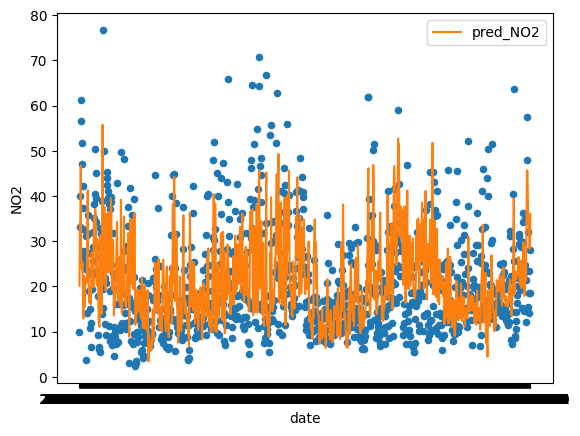

In [ ]:
data["pred_NO2"] = pred
f, ax = plt.subplots()
data.plot(x = "date", y = "NO2", kind="scatter", ax=ax)
data.plot(x = "date", y = "pred_NO2", kind="line", ax=ax, color="tab:orange")
plt.show()

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
              }
grid_GBR = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X, Y)
print(grid_GBR.best_estimator_)
print(grid_GBR.best_params_, grid_GBR.best_score_)

GradientBoostingRegressor(learning_rate=0.02, max_depth=4, subsample=0.1)
{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.1} 0.35929751364932416


normal --> -0.21


In [ ]:
param_grid = {"alpha": [0.25, 0.5, 1, 2, 4, 8, 16]}
grid = GridSearchCV(Ridge(), param_grid,
                    cv=KFold(n_splits=10),
                    refit = True, verbose = 3,n_jobs=-1)
grid_result = grid.fit(X, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best: -0.187550 using {'alpha': 16}
-0.188561 (0.212386) with: {'alpha': 0.25}
-0.188544 (0.212394) with: {'alpha': 0.5}
-0.188510 (0.212412) with: {'alpha': 1}
-0.188441 (0.212447) with: {'alpha': 2}
-0.188307 (0.212515) with: {'alpha': 4}
-0.188045 (0.212650) with: {'alpha': 8}
-0.187550 (0.212908) with: {'alpha': 16}


In [ ]:
"""nonDistDict = {"Arnavutkoy": ["mean_temp", "rel_hum", "gas_consumption", "O3"],
               "Basaksehir": ["mean_temp", "gas_consumption"],
               "Besiktas": ["mean_temp", "gas_consumption"],
               "Esenler": ["mean_temp", "gas_consumption", "O3"],
               "Fatih": ["mean_temp", "gas_consumption", "PM10", "O3"],
               "Kadikoy": ["mean_temp", "gas_consumption", "PM10"],
               "Kartal": [ "rel_hum", "gas_consumption","PM10"],
               "Sancaktepe": ["mean_temp", "rel_hum", "gas_consumption"],
               "Sariyer": ["mean_temp", "gas_consumption", "NO2", "PM10",
                           "SO2", "O3"],
               "Sile": ["mean_temp", "rel_hum", "gas_consumption", "NO2", "PM10",
                        "SO2"],
               "Silivri": ["mean_temp", "rel_hum", "gas_consumption", "NO2", "PM10",
                           "SO2", "O3"],
               "Sultangazi": ["mean_temp", "gas_consumption", "SO2"],
               "Umraniye":[ "gas_consumption", "SO2"],
               "Uskudar": ["mean_temp", "gas_consumption"]}

for district in nonDistDict.keys():
  f, axs = plt.subplots(1, len(nonDistDict[district]))
  for param in nonDistDict[district]:
    districtsDict[district][param] = 1/districtsDict[district][param]
    districtsDict[district][param] = districtsDict[district][param].replace([np.inf, -np.inf], 0)
    print(district, param),
    try:
      sm.qqplot(data = districtsDict[district][param], ax = axs[nonDistDict[district].index(param)], line="q").set_xlabel(param)
    except TypeError:
      # due to axs is just one axes
      districtsDict[district][param].plot(kind="kde", ax = axs).set_xlabel(param)
  plt.savefig("/content/drive/MyDrive/PROJ201/ProbPlot/zzlog_"+district+".png")"""